# 딥러닝의 대표 데이터셋 MNIST  , 패션 MNIST
    MNIST : 0 ~9 손글씨, 패션 MNIST 10개의 패션 아이팀

In [1]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 7.4 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     --------------------------------------- 23.2/23.2 MB 38.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 92.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 104.7 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 64.3 MB/s eta 0:00:00
     ------------------------------------- 895.7/895.7 kB 59.0 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 3.7/3.7 MB 60.0 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 41.6 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 26.8 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-

In [2]:
from tensorflow import keras

In [4]:
(x_train,y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [8]:
import matplotlib.pyplot as plt

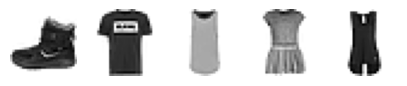

In [11]:
# 제공된 수치형 데이터가 어떤 이미지 인지 확인
_, axs = plt.subplots(1,5,figsize=(5,5))
for i in range(5):
    axs[i].imshow(x_train[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()  
    

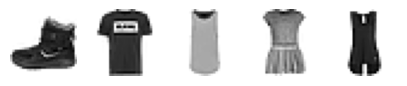

In [20]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i],cmap='gray_r')
    plt.axis('off')
plt.show()    

In [22]:
import numpy as np

In [24]:
# 해당 이미지를 나타내는 레이블은 ?
np.unique( y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [25]:
# 샘플이 60000가나 된다... 헉 많다... 그래서 이걸 한번에 학습하는 일반적인 머신러닝보다
# 샘플을 하나씩 꺼내서 모델을 훈련하는 점진적 경사 하강법을 이용....
# SGDClassfier   loss 매개변수의 값을 log로 지정--> 로지스틱 손실함수를 최소화는 확률적 경사하강법 모델을 만듦
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

In [41]:
sgdc = SGDClassifier(loss='log',random_state=0)
x_train_scaled = x_train / 255.0
x_train_scaled = x_train_scaled.reshape(-1, 28*28)
scores = cross_validate(sgdc, x_train_scaled,y_train,n_jobs=-1)

In [42]:
scores['test_score'].mean()

0.8434166666666666

In [43]:
np.mean(scores['test_score'])

0.8434166666666666

# 인공신경망 만들기

In [44]:
from sklearn.model_selection import  train_test_split
train_scaled, val_scaled, train_target, val_target =  train_test_split(x_train_scaled, y_train, random_state=0)

In [46]:
train_scaled.shape,train_target.shape

((45000, 784), (45000,))

In [47]:
# 모델 제작
# 신경망 제작
dense = keras.layers.Dense(10,activation='softmax', input_shape=(784,) )

In [48]:
# 신경망 결합 - 모델
model = keras.Sequential(dense)

In [ ]:
# keras.losses.sparse_categorical_crossentropy

In [49]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

In [52]:
model.fit(train_scaled,train_target,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4238 - accuracy: 0.8570
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4200 - accuracy: 0.8592
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4150 - accuracy: 0.8596
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4124 - accuracy: 0.8621
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4101 - accuracy: 0.8613
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4070 - accuracy: 0.8638
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4064 - accuracy: 0.8637
Epoch 8/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4038 - accuracy: 0.8646
Epoch 9/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.4030 - accuracy: 0.8641
Epoch 10/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.401

In [53]:
model.evaluate(val_scaled,val_target)

469/469 [==============================] - 1s 1ms/step - loss: 0.4381 - accuracy: 0.8538


[0.4380902945995331, 0.8537999987602234]

In [54]:
## 정리
# 딥러닝 - 인공신경망 - 밀집층 Dense  
# 1. Dense층을 만든다(하나또는 여러개) - 인간의 신경망을 흉내
#    출력갯수, 화성화함수 ,                입력의 shape
#                - 시그모이드 : 이진분류
#                - 소프트맥스 : 다중분류
# 2. Sequence로 층들을 묶는다 - model
# 3. model을 컴파일한다 - 손실함수
#                        바이너리 크로스엔트로피 : 이진분류
#                        카테고리컬 크로스엔트로피 : 다중분류
#                        스페어 카테고리컬 크로스엔트로피 : 다중분류인데. 정답이 원핫으로 안되어 있을때 
# 4. 모델을 학습한다 - 머신러닝과 동일  epoch를 지정(학습횟수)
# 5. 평가 - evaluate
# 6. 예측(분류) - predict

In [55]:
fruits = np.load('fruits_300.npy')

In [56]:
fruits.shape

(300, 100, 100)

In [58]:
target = [0]*100 + [1]*100 + [2]*100

In [61]:
x_train,x_test,y_train,y_test =  train_test_split(fruits,target)

In [72]:
x_train_scaled = x_train / 255.0
x_train_scaled = x_train_scaled.reshape(-1,100*100)

In [74]:
x_train_scaled.shape, x_train_scaled.shape[1]

((225, 10000), 10000)

In [75]:
dense = keras.layers.Dense(3,activation='softmax',input_shape = (10000,) )